<a href="https://colab.research.google.com/github/Theophilus12/Comprehensive-Analysis-of-UK-AADF-Traffic-Dataset-Set-Within-Four-Geographical-Regions-o-f-England/blob/main/UK_traffic_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing neccessary libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/dft_traffic_counts_aadf.csv") #reading in the dataset

In [ ]:
#data=pd.read_csv("dft_traffic_counts_aadf.csv") #reading in the dataset

In [ ]:
data.shape # checking the dimension of the data

(489159, 33)

In [ ]:
#basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489159 entries, 0 to 489158
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            489159 non-null  int64  
 1   count_point_id                489159 non-null  int64  
 2   year                          489159 non-null  int64  
 3   region_id                     489159 non-null  int64  
 4   local_authority_id            489159 non-null  int64  
 5   road_name                     489159 non-null  object 
 6   road_category                 489159 non-null  object 
 7   road_type                     489159 non-null  object 
 8   start_junction_road_name      376026 non-null  object 
 9   end_junction_road_name        376035 non-null  object 
 10  easting                       489159 non-null  int64  
 11  northing                      489159 non-null  int64  
 12  latitude                      489159 non-nul

 ### Representation of interested Regions.
 1. region_id of 5=North West
 2. = region_id of 6= London
 3. region_id of 8=Yorkshire and The Humber
 4. region_id of 11=North East
 


In [ ]:
new_data=data[data["region_id"].isin([5, 6,8,11])] #subsetting required regions

In [ ]:
new_data.to_csv("Uk_4_regions_traffic_data.csv") # for future refernce 

In [ ]:
pd.set_option('display.max_columns',None)
data=pd.read_csv("Uk_4_regions_traffic_data.csv") #reading the subset data

In [ ]:
data.shape

(166020, 34)

### Basic Information about the data

In [ ]:
print(f"This dataset consisting of the 4 UK regions listed above has {data.shape[0]} rows and {data.shape[1]} columns")

This dataset consisting of the 4 UK regions listed above has 166020 rows and 34 columns


In [ ]:
data.columns #column names

Index(['Unnamed: 0', 'id', 'count_point_id', 'year', 'region_id',
       'local_authority_id', 'road_name', 'road_category', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'sequence', 'ramp', 'estimation_method',
       'estimation_method_detailed', 'pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
       'all_motor_vehicles'],
      dtype='object')

In [ ]:
data.info() #basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166020 entries, 0 to 166019
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    166020 non-null  int64  
 1   id                            166020 non-null  int64  
 2   count_point_id                166020 non-null  int64  
 3   year                          166020 non-null  int64  
 4   region_id                     166020 non-null  int64  
 5   local_authority_id            166020 non-null  int64  
 6   road_name                     166020 non-null  object 
 7   road_category                 166020 non-null  object 
 8   road_type                     166020 non-null  object 
 9   start_junction_road_name      131167 non-null  object 
 10  end_junction_road_name        131163 non-null  object 
 11  easting                       166020 non-null  int64  
 12  northing                      166020 non-nul

In [ ]:
#percentage of missing values
data.isnull().mean()*100 

Unnamed: 0                       0.000000
id                               0.000000
count_point_id                   0.000000
year                             0.000000
region_id                        0.000000
local_authority_id               0.000000
road_name                        0.000000
road_category                    0.000000
road_type                        0.000000
start_junction_road_name        20.993254
end_junction_road_name          20.995663
easting                          0.000000
northing                         0.000000
latitude                         0.000000
longitude                        0.000000
link_length_km                  20.952295
link_length_miles               20.952295
sequence                        20.952295
ramp                            73.528491
estimation_method                0.000000
estimation_method_detailed       0.000000
pedal_cycles                     0.000000
two_wheeled_motor_vehicles       0.000000
cars_and_taxis                   0

##Data Cleaning and Preparation

In [ ]:
#dropping unneccessary columns
data.drop(["Unnamed: 0","id","count_point_id","link_length_km","link_length_miles","start_junction_road_name","end_junction_road_name","sequence","ramp"],axis=1,inplace=True)

In [ ]:
data.isnull().mean()

year                            0.0
region_id                       0.0
local_authority_id              0.0
road_name                       0.0
road_category                   0.0
road_type                       0.0
easting                         0.0
northing                        0.0
latitude                        0.0
longitude                       0.0
estimation_method               0.0
estimation_method_detailed      0.0
pedal_cycles                    0.0
two_wheeled_motor_vehicles      0.0
cars_and_taxis                  0.0
buses_and_coaches               0.0
lgvs                            0.0
hgvs_2_rigid_axle               0.0
hgvs_3_rigid_axle               0.0
hgvs_4_or_more_rigid_axle       0.0
hgvs_3_or_4_articulated_axle    0.0
hgvs_5_articulated_axle         0.0
hgvs_6_articulated_axle         0.0
all_hgvs                        0.0
all_motor_vehicles              0.0
dtype: float64

In [ ]:
#checking for duplicate values
data.duplicated().sum()

1

In [ ]:
#dropping duplicate values
data.drop_duplicates(inplace=True)

In [ ]:
#mapping each id to corresponding region name
convert_id_to_region={5:"North West",6:"London",8:"Yorkshire and The Humber",11:"North East"}
data["region"]=data["region_id"].map(convert_id_to_region)

In [ ]:
data.drop(["region_id"],axis=1,inplace=True) #dropping the id

In [ ]:
col = data["region"]
data.insert(1, "region_name", col) #changing positon of region name 

In [ ]:
data=data.drop(["region"],axis=1) 

In [ ]:
#converting columns into categorical data type
cols=["road_type","road_category","region_name"]
for column in cols:
  data[column]=data[column].astype("category")

In [ ]:
#creating a dictionary of local authority id and their respective local authority name
york={194:"Barnsley",195:"Bradford",87:"Calderdale",79:"Doncaster",89:"East Riding of Yorkshire",169:"Kingston upon Hull, City of",197:"Kirklees",63:"Leeds",202:"York",131:"North East Lincolnshire",130:"North Lincolnshire",100:"North Yorkshire",62:"Rotherham",159:"Sheffield",88:"Wakefield"}
lond={168:"Barking and Dagenham",57:"Barnet",106:"Bexley",118:"Brent",176:"Bromley",145:"Camden",174:"City of London",134:"Croydon",167:"Newham",124:"Redbridge",175:"Richmond upon Thames",103:"Southwark",177:"Sutton",93:"Tower Hamlets",125:"Waltham Forest",108:"Wandsworth",147:"Ealing",121:"Enfield",105:"Greenwich",122:"Hackney",146:"Hammersmith and Fulham",165:"Haringey",185:"Harrow",201:"Havering",109:"Westminster",66:"Hillingdon",111:"Hounslow",96:"Islington",110:"Kensington and Chelsea",178:"Kingston upon Thames",107:"Lambeth",104:"Lewisham",204:"Merton"}
NE={164:"Darlington",92:"Durham",101:"Gateshead",132:"Hartlepool",170:"Middlesbrough",172:"Newcastle upon Tyne",173:"North Tyneside",102:"Northumberland",171:"Redcar and Cleveland",166:"South Tyneside",163:"Stockton-on-Tees",94:"Sunderland"}
NW={198:"Blackburn with Darwen",193:"Blackpool",160:"Bolton",86:"Bury",77:"Cumbria",73:"East Cheshire",156:"Halton",157:"Knowsley",76:"Lancashire",161:"Liverpool",85:"Manchester",162:"Oldham",95:"Rochdale",90:"Salford",192:"Sefton",158:"St. Helens",56:"Stockport",196:"Tameside",91:"Trafford",74:"Warrington",148:"West Cheshire",75:"Wigan",84:"Wirral"}

In [ ]:
new_dict={**york,**NE,**NW,**lond}

In [ ]:
dict_map=[]
for k in new_dict:
  dict_map.append(k)
data=data[data["local_authority_id"].isin(dict_map)] #subsetting the local authority id from the ones present in new_dict

In [ ]:
data["local_authority"]=data["local_authority_id"].map(new_dict) #renaming the local authority id to names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
col = data["local_authority"]
data.insert(2, "local_authority_name", col) #changing it's position

In [ ]:
data.drop(["local_authority"],axis=1,inplace=True) #dropping the local authority column

In [ ]:
data.head() #checking the first few rows of the dataset

,year,region_name,local_authority_name,local_authority_id,road_name,road_category,road_type,easting,northing,latitude,longitude,estimation_method,estimation_method_detailed,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,2019,North West,Manchester,85,A560,PA,Major,380000,389400,53.401041,-2.302268,Estimated,Estimated using previous year's AADF on this link,214,91,22425,391,2768,158,54,24,7,2,8,253,25927
1,2019,North West,Oldham,162,A62,PA,Major,392080,404710,53.538976,-2.120975,Counted,Manual count,0,159,46216,186,7242,629,152,152,37,120,196,1285,55089
2,2019,Yorkshire and The Humber,North Yorkshire,100,A19,PA,Major,461300,432350,53.783874,-1.071138,Estimated,Estimated using previous year's AADF on this link,178,81,8129,161,1004,58,4,2,8,4,4,81,9456
3,2019,Yorkshire and The Humber,North Yorkshire,100,A684,PA,Major,440000,496670,54.363987,-1.385911,Estimated,Estimated using previous year's AADF on this link,1,45,7427,58,1508,199,30,29,17,23,28,327,9365
4,2019,North West,Oldham,162,A627,PA,Major,392178,405330,53.544550,-2.119512,Estimated,Estimated using previous year's AADF on this link,79,56,10515,279,943,80,14,2,5,9,3,113,11905


In [ ]:
data["all_pedals_vehicles"]=data["pedal_cycles"]+data["all_motor_vehicles"] #getting the total AADF for all transport mode

In [ ]:
#checking for road_type percentage in the dataset
data['road_type'].value_counts(normalize=True)*100

Major    78.949082
Minor    21.050918
Name: road_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


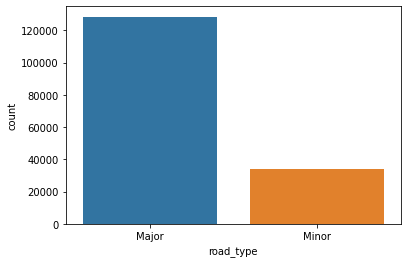

In [ ]:
# checking for the analysis road_type
sns.countplot(data['road_type'])

### Exploratory Data Analysis

1. Total number of records for each region
2. How many local authorities are in each region
3. AADF of vehicles in each road type
4. Top 5 busiest local authorities in each region
5. Trend of total traffic volume,total traffic for vehicles and petals over the year
6. Effect of yearly trend on total traffic volume on road type
7. AADF Distribution of the vehicles

In [ ]:
data.head(2)

,year,region_name,local_authority_name,local_authority_id,road_name,road_category,road_type,easting,northing,latitude,longitude,estimation_method,estimation_method_detailed,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,all_pedals_vehicles
0,2019,North West,Manchester,85,A560,PA,Major,380000,389400,53.401041,-2.302268,Estimated,Estimated using previous year's AADF on this link,214,91,22425,391,2768,158,54,24,7,2,8,253,25927,26141
1,2019,North West,Oldham,162,A62,PA,Major,392080,404710,53.538976,-2.120975,Counted,Manual count,0,159,46216,186,7242,629,152,152,37,120,196,1285,55089,55089


## 1. Total number of records for each region


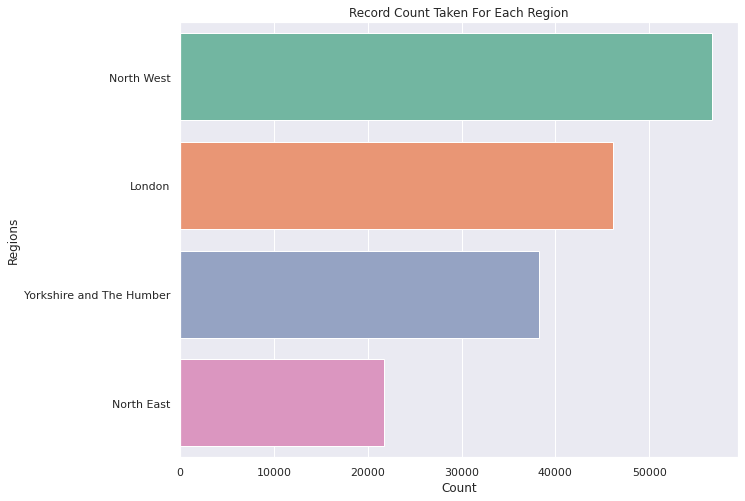

In [ ]:
# plotting a counplot to count total number of records in each region
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.set_palette(sns.color_palette("Set2"))
chart=sns.countplot(y=data.region_name,order = data['region_name'].value_counts().index)
chart.set(title="Record Count Taken For Each Region",xlabel="Count",ylabel="Regions");

## 2. How many local authorities are in each region

In [ ]:
 # This is to know how many local authorities are present in each zone
 data.groupby("region_name").agg({"local_authority_name":"nunique"}) 

,local_authority_name
region_name,
London,33
North East,12
North West,23
Yorkshire and The Humber,15


## 3. AADF of vehicles in each road type

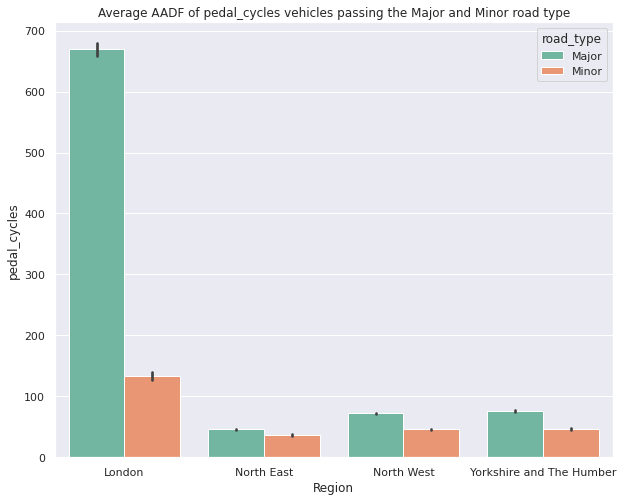

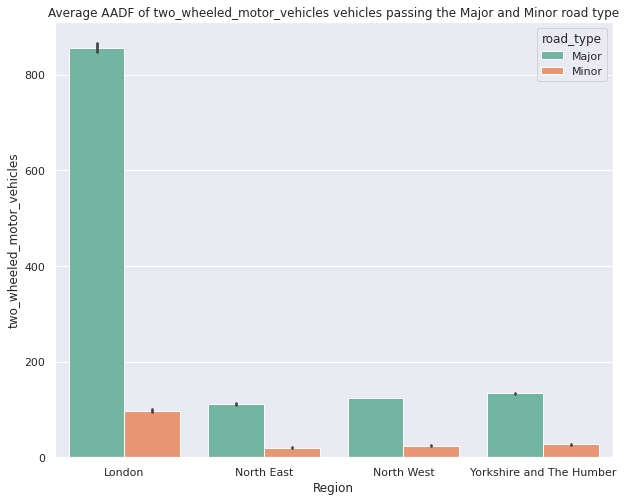

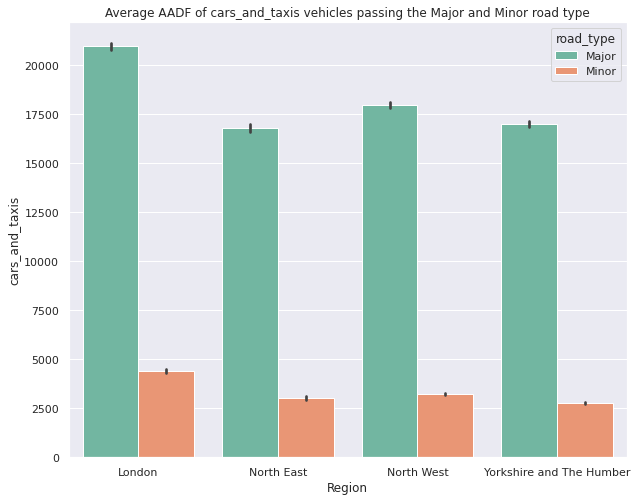

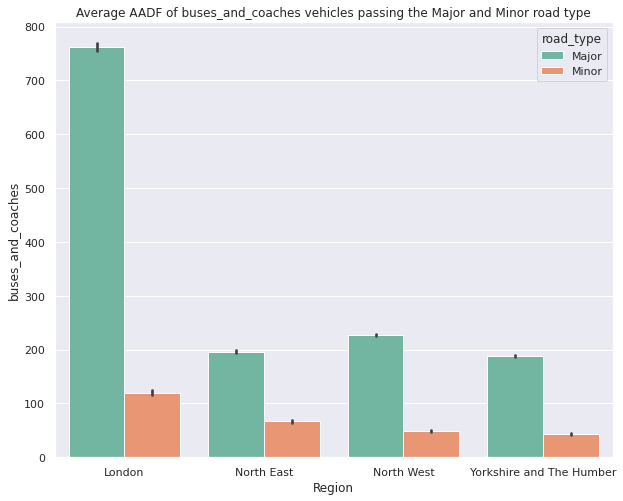

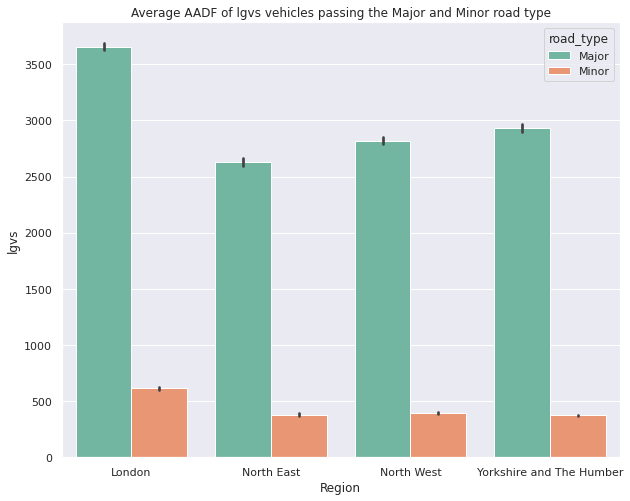

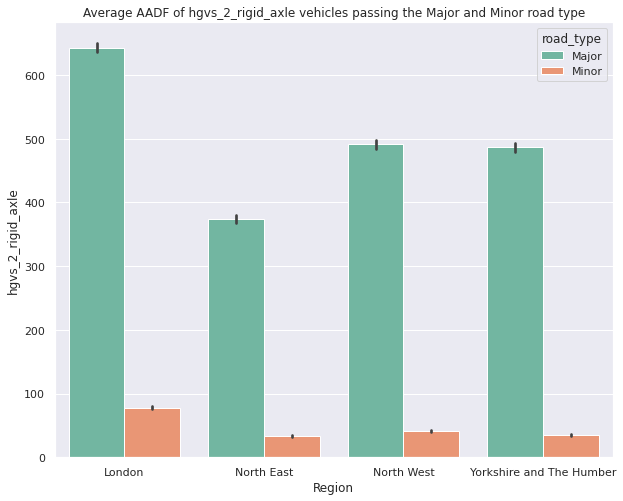

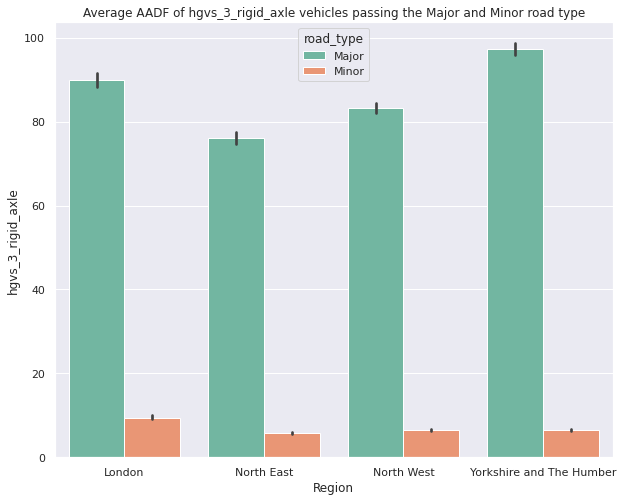

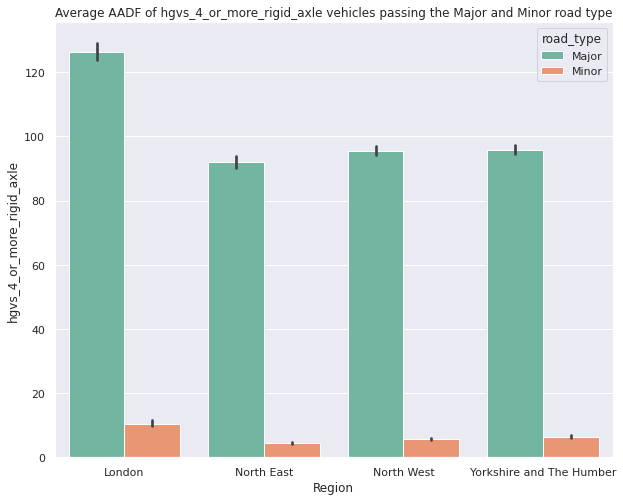

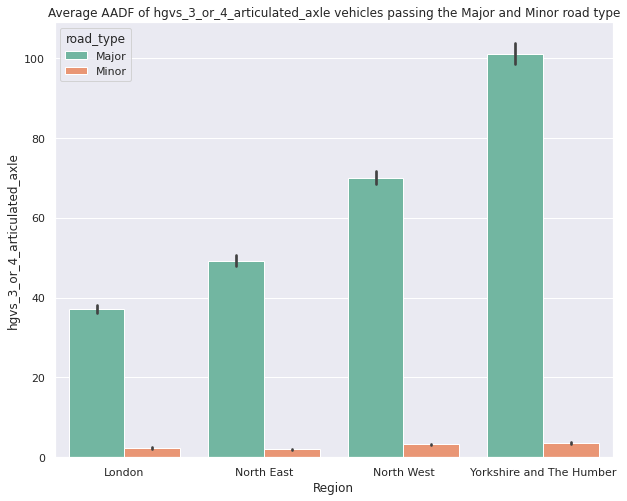

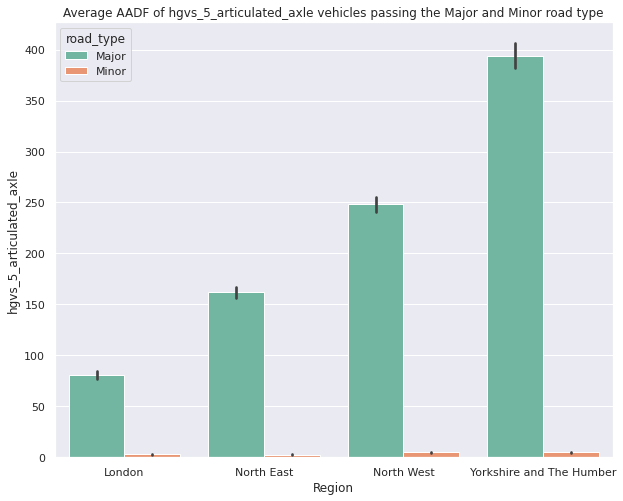

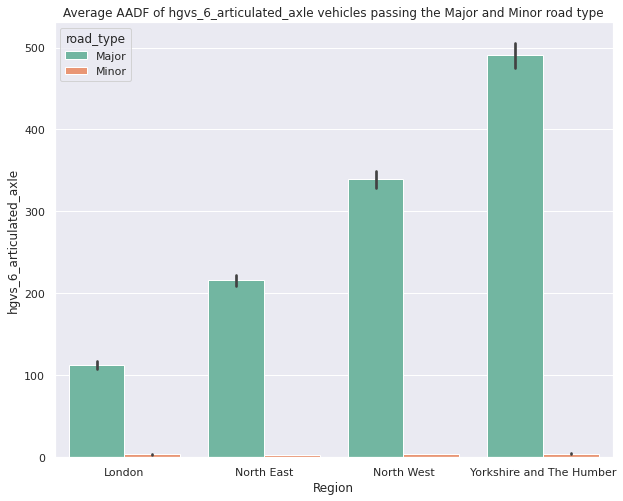

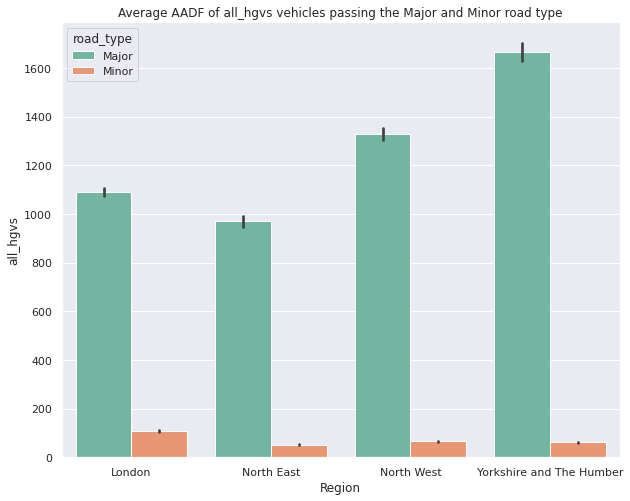

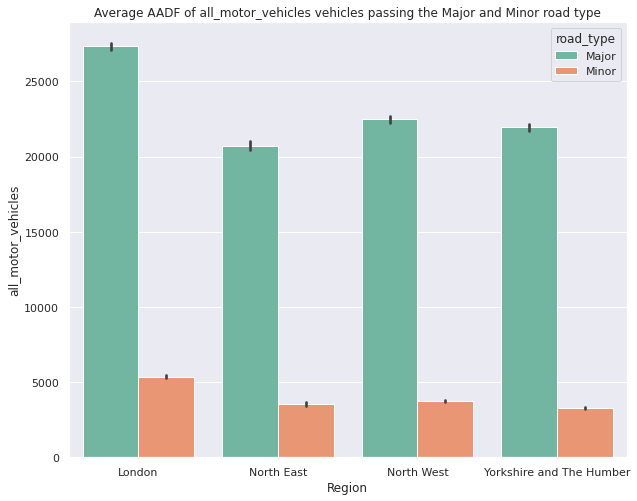

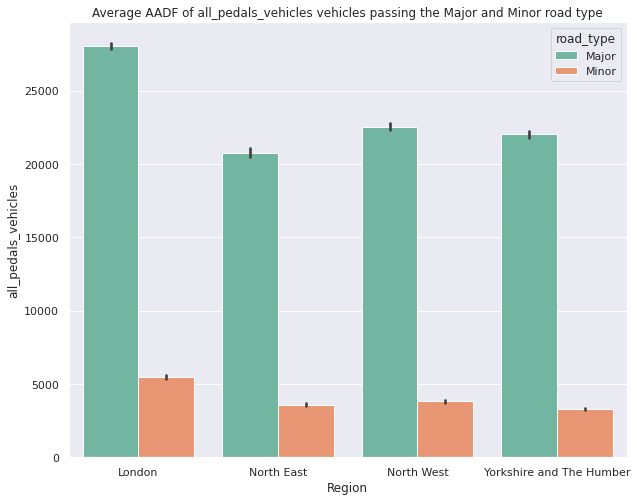

In [ ]:
# plotting a barchart to visualize the AADF of each vehicle type

cols=["pedal_cycles",'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',"all_motor_vehicles","all_pedals_vehicles"]

for col in cols:
  plt.figure(figsize=(10,8))
  sns.set(style='darkgrid')
  sns.set_palette(sns.color_palette("Set2"))
  chart=sns.barplot(data=data,x="region_name",y=col,hue="road_type")
  chart.set(title=f"Average AADF of {col} vehicles passing the Major and Minor road type",xlabel="Region")

## 4. Top 5 busiest location in each region

In [ ]:
#Getting the data belonging to each individual region
london=data[data["region_name"]=="London"]
NW=data[data["region_name"]=="North West"]
NE=data[data["region_name"]=="North East"]
york=data[data["region_name"]=="Yorkshire and The Humber"]

In [ ]:
def plot_best_local(data,name):
  """A function that plots a barchart showing the top busiest local authority in each region"""
  plt.figure(figsize=(20,8))
  sns.set(style='darkgrid')
  sns.set_palette(sns.color_palette("Set2"))
  data.groupby('local_authority_name')['all_pedals_vehicles'].sum().nlargest(5).plot(kind="bar",title=f"Top 5 busiest local authorities in {name}",xlabel="Local Authority",ylabel="Total AADF for all transportation mode")

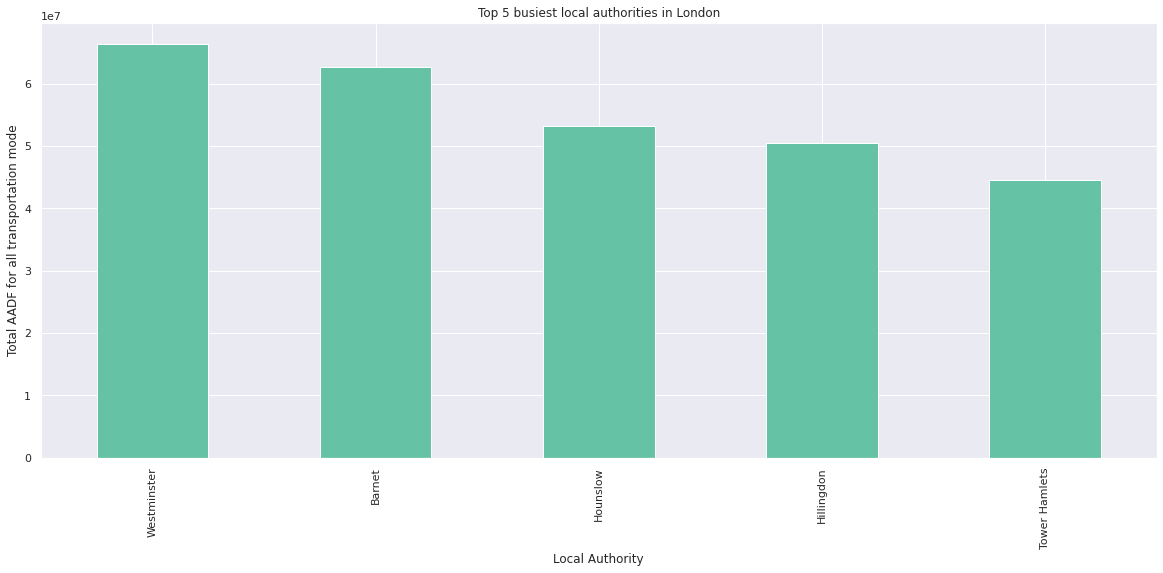

In [ ]:
plot_best_local(london,"London")

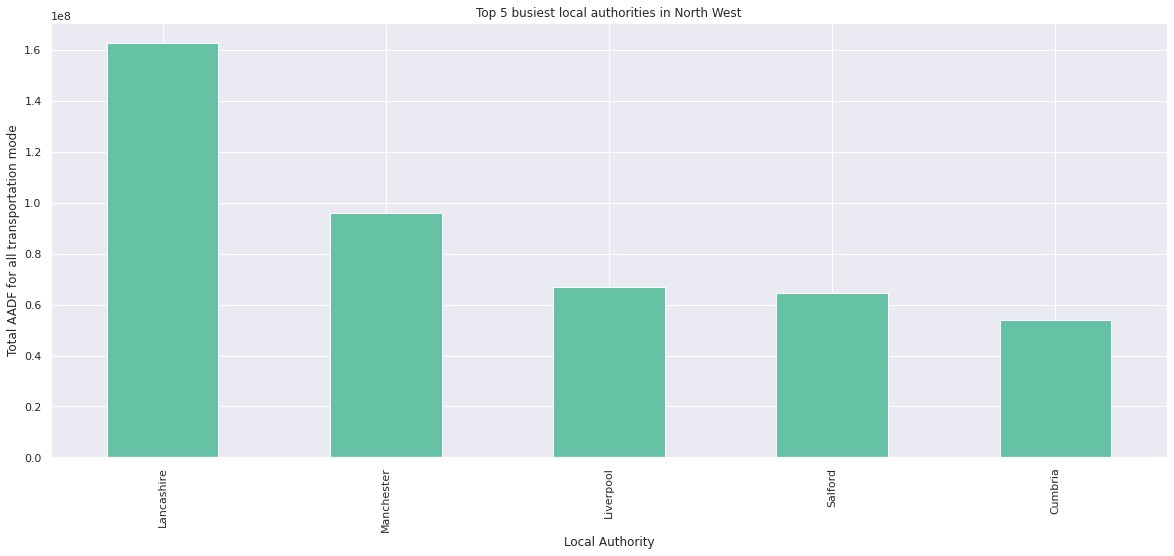

In [ ]:
plot_best_local(NW,"North West")

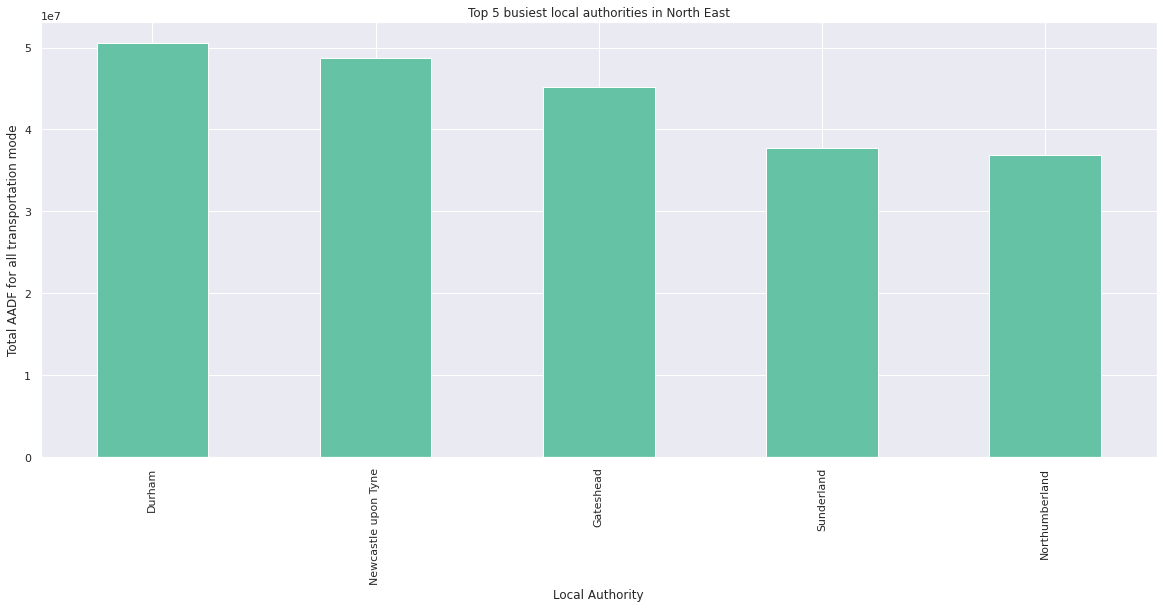

In [ ]:
plot_best_local(NE,"North East")

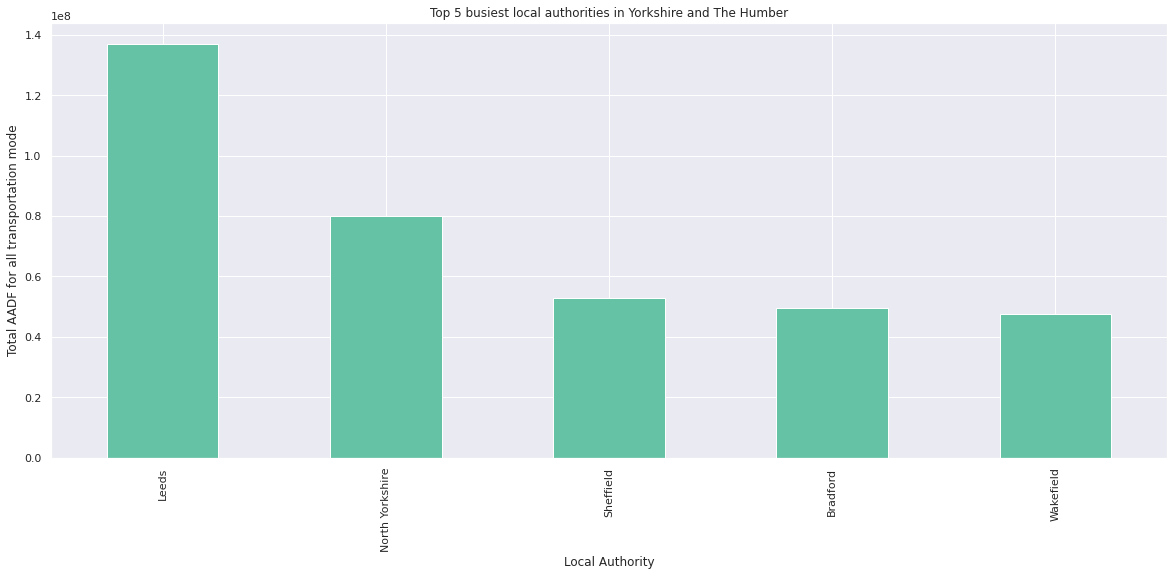

In [ ]:
plot_best_local(york,"Yorkshire and The Humber")

## 5. Yearly trend of AADF of pedal vehicles,all motor vehicles and total AADF for all the vehicle type

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


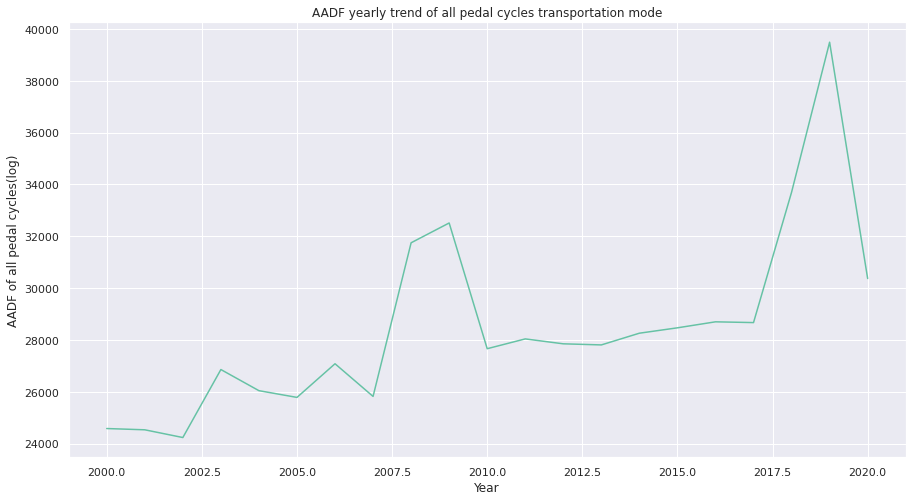

In [ ]:
#Plotting the trend of pedal cycles AADF over the years
plt.figure(figsize=(15,8))
sns.lineplot(data["year"],np.log(data["pedal_cycles"]),estimator="sum",ci=None)
plt.title("AADF yearly trend of all pedal cycles transportation mode")
plt.xlabel("Year")
plt.ylabel("AADF of all pedal cycles(log)")
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


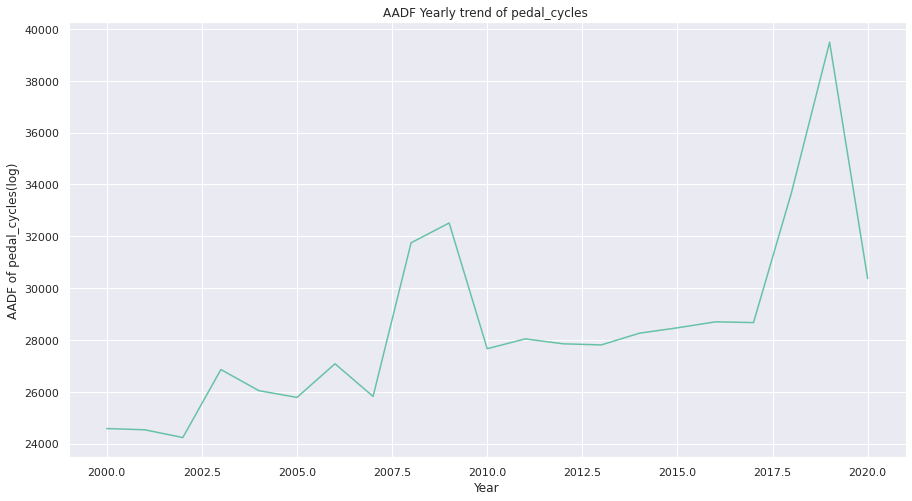

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


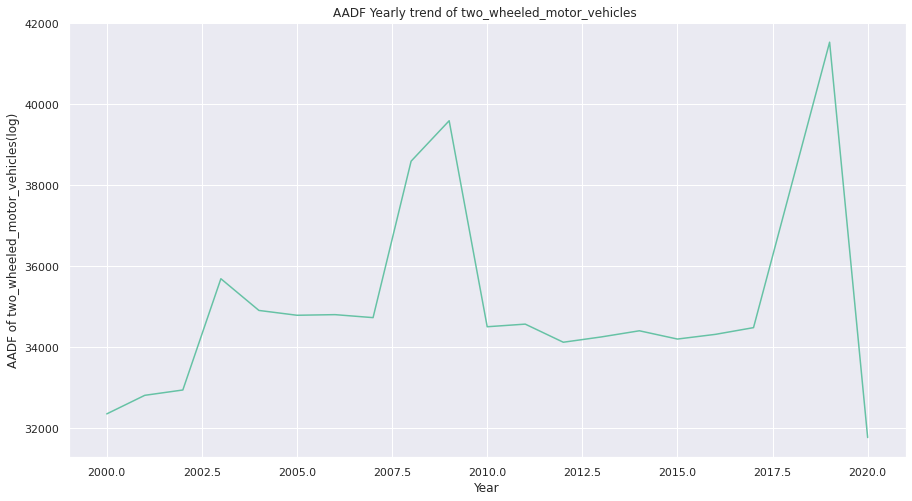

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


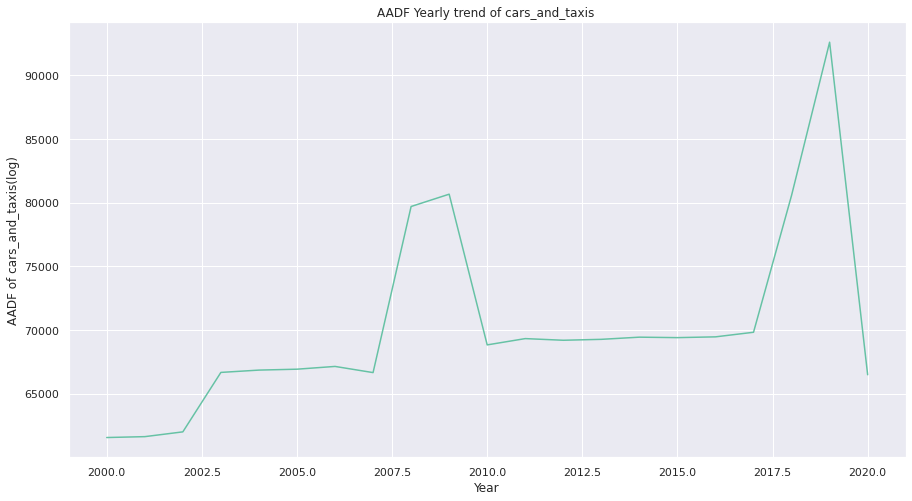

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


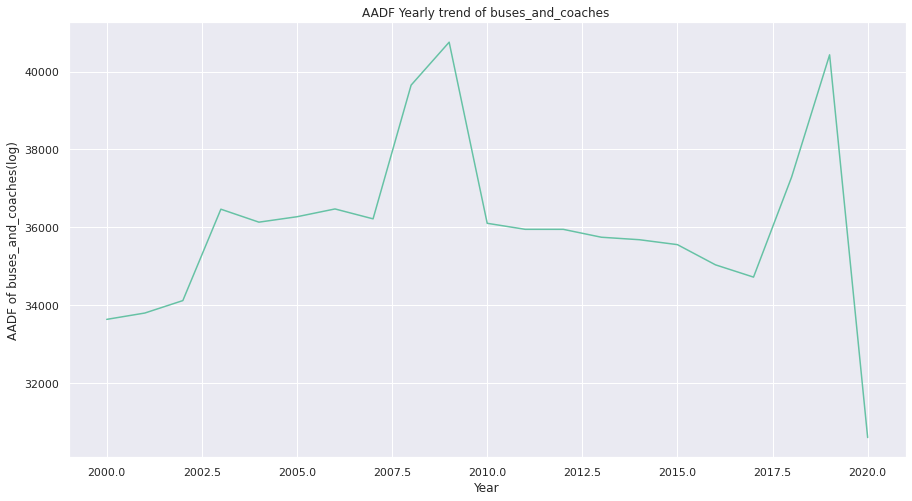

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


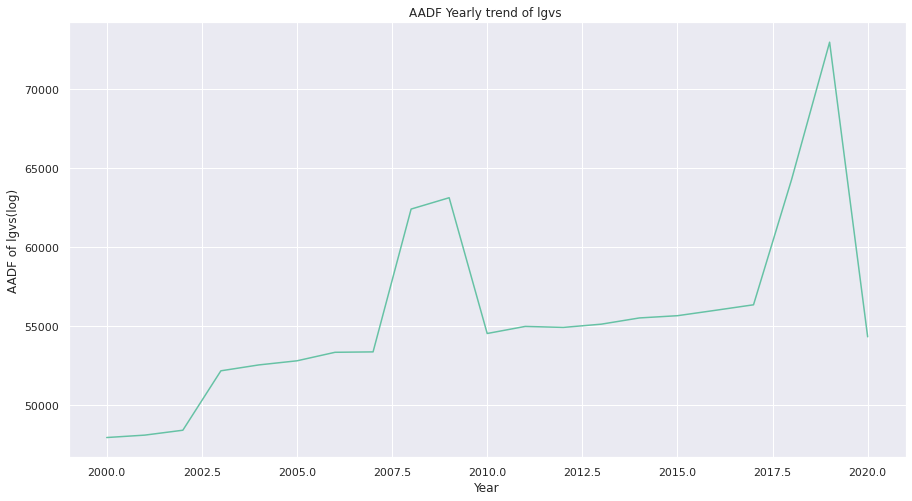

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


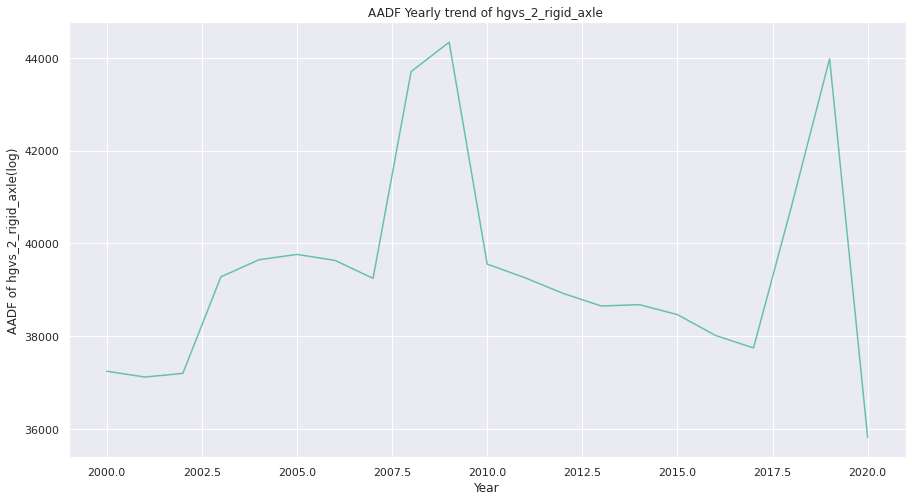

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


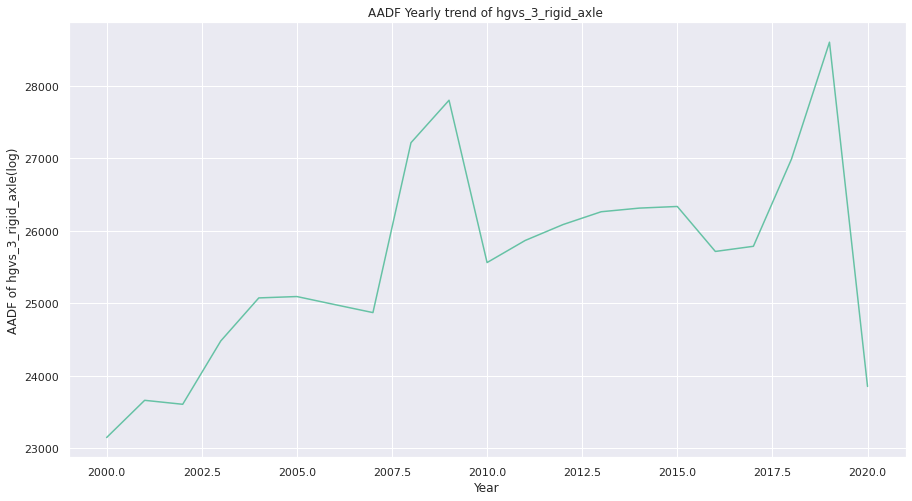

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


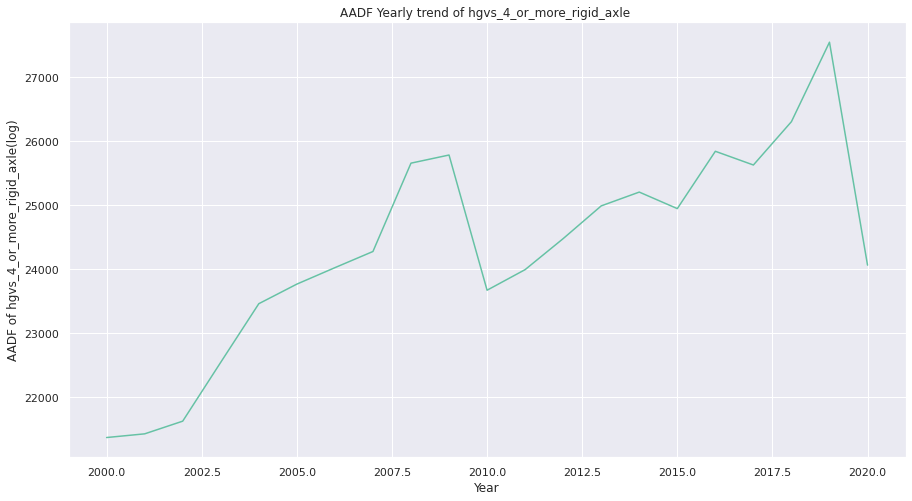

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


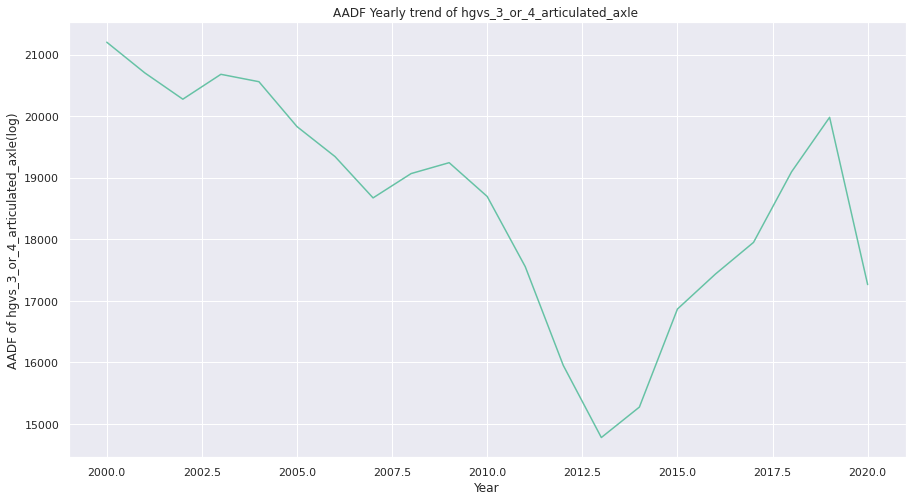

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


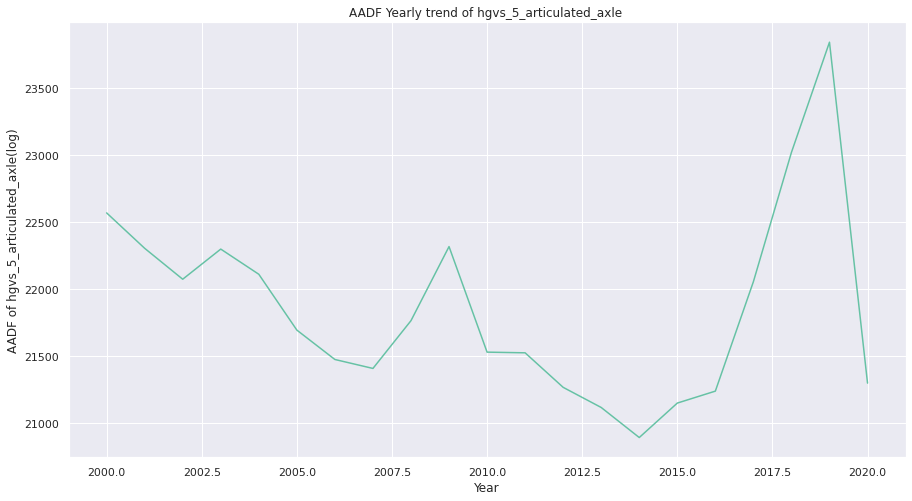

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


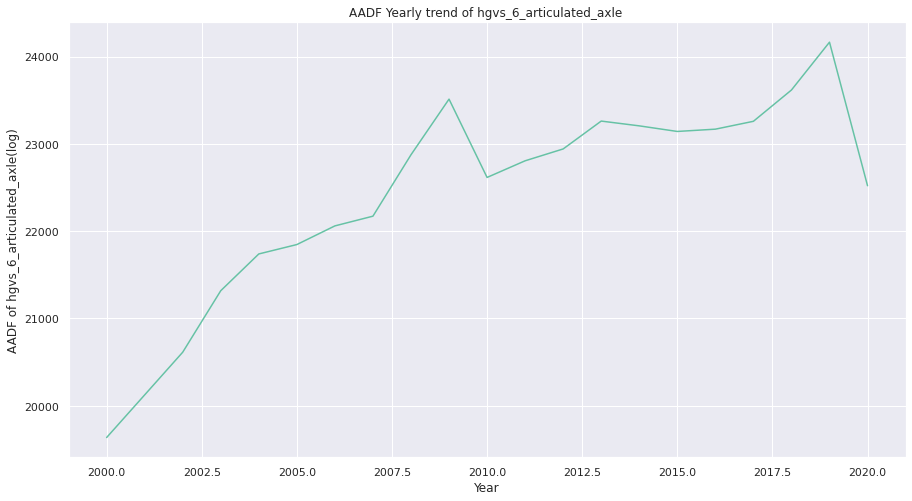

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


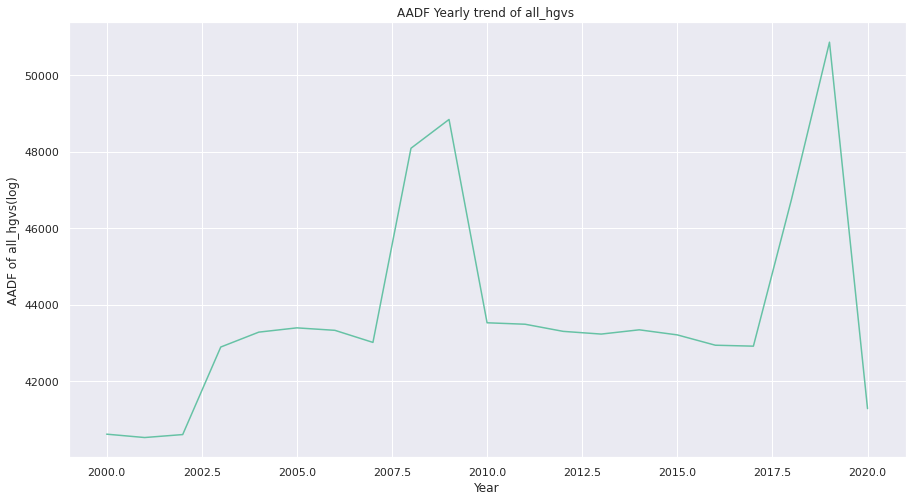

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


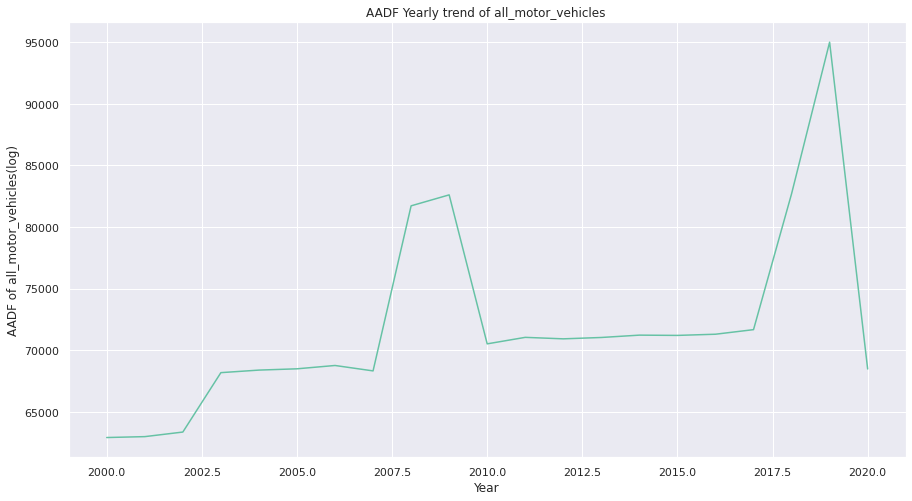

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


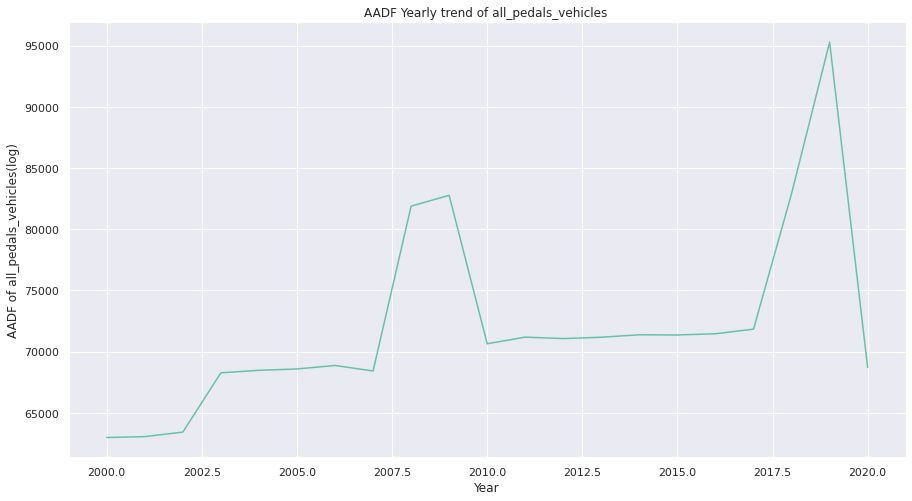

In [ ]:
#Plotting the trend of each vehicle AADF over the years

columns=['pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
       'all_motor_vehicles', 'all_pedals_vehicles']

for col in columns:
  plt.figure(figsize=(15,8))
  sns.lineplot(data["year"],np.log(data[col]),estimator="sum",ci=None)
  plt.title(f"AADF Yearly trend of {col} ")
  plt.xlabel("Year")
  plt.ylabel(f"AADF of {col}(log)")
  plt.show()


## 6. Effect of yearly trend on total traffic volume on road type

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


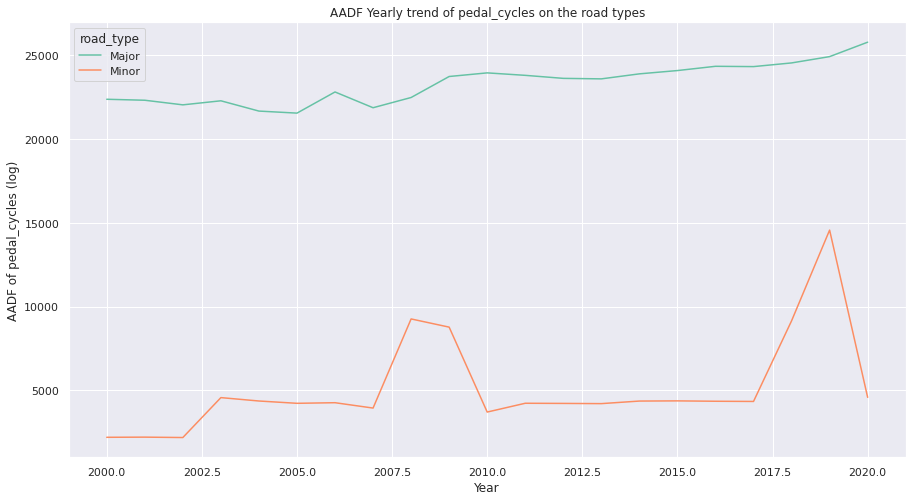

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


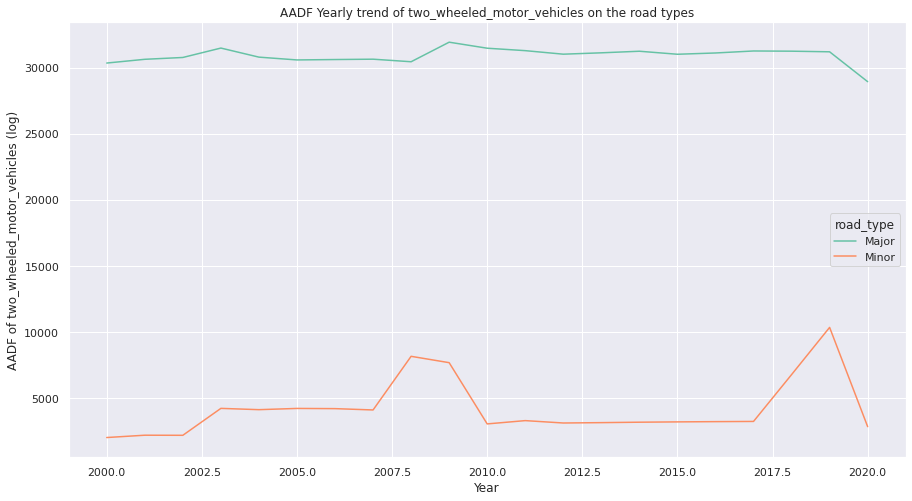

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


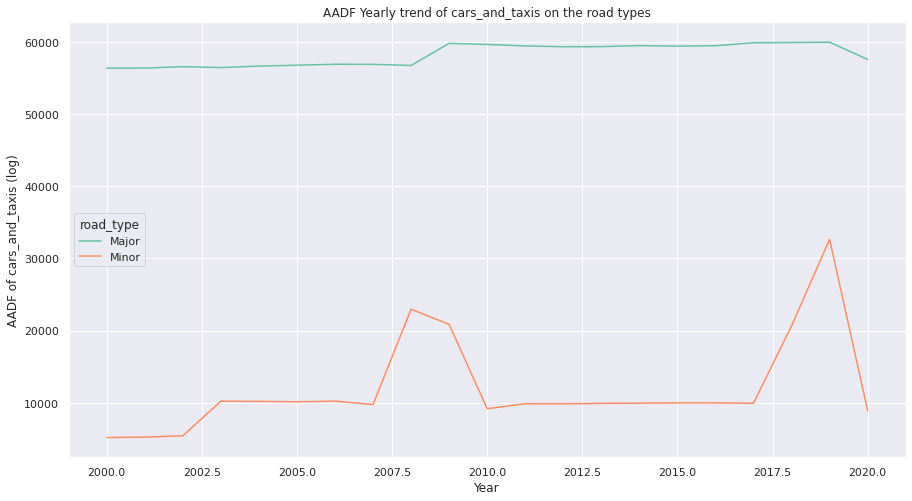

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


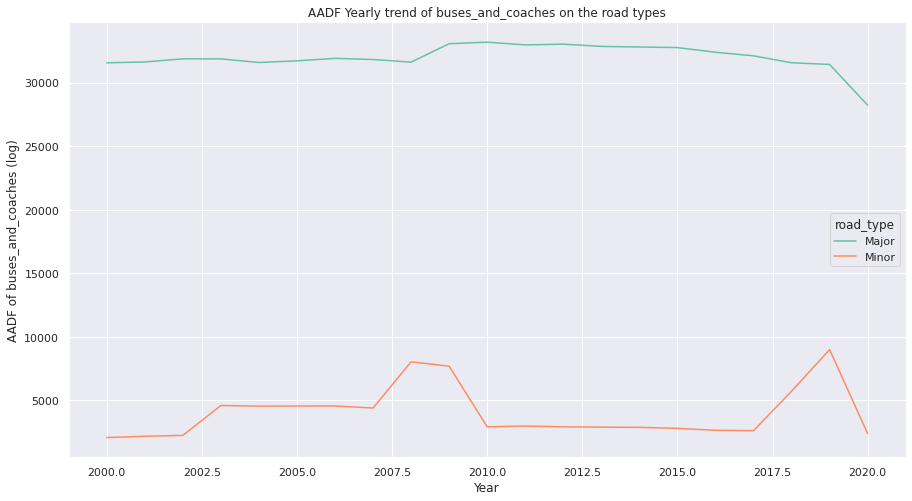

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


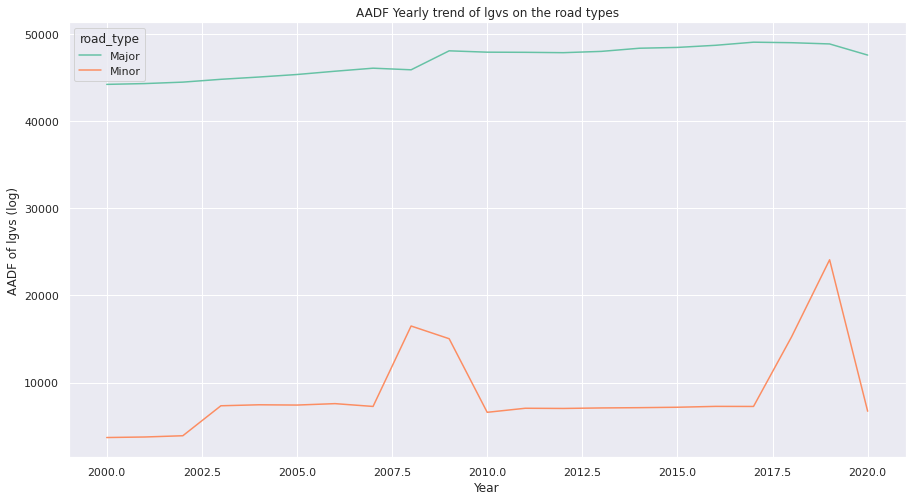

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


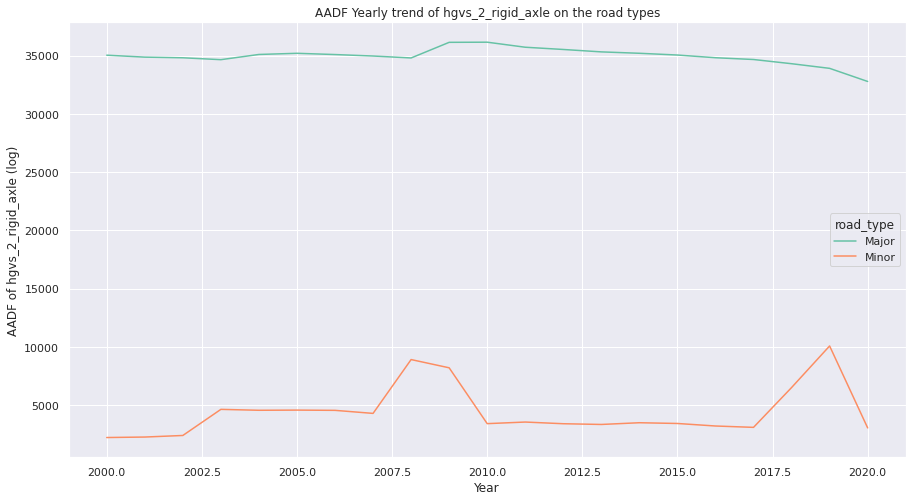

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


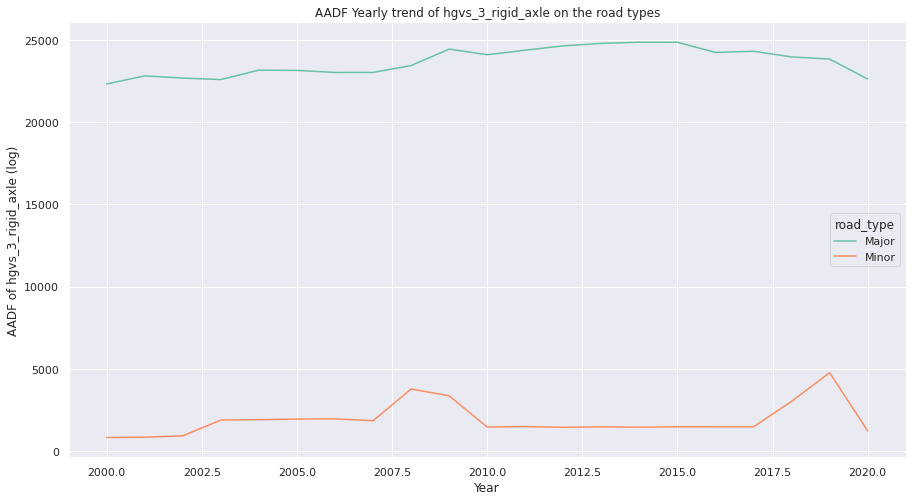

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


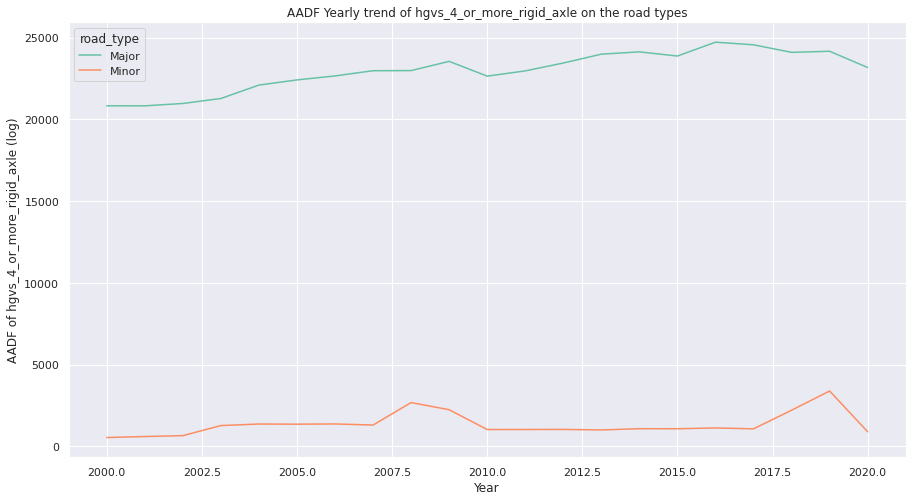

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


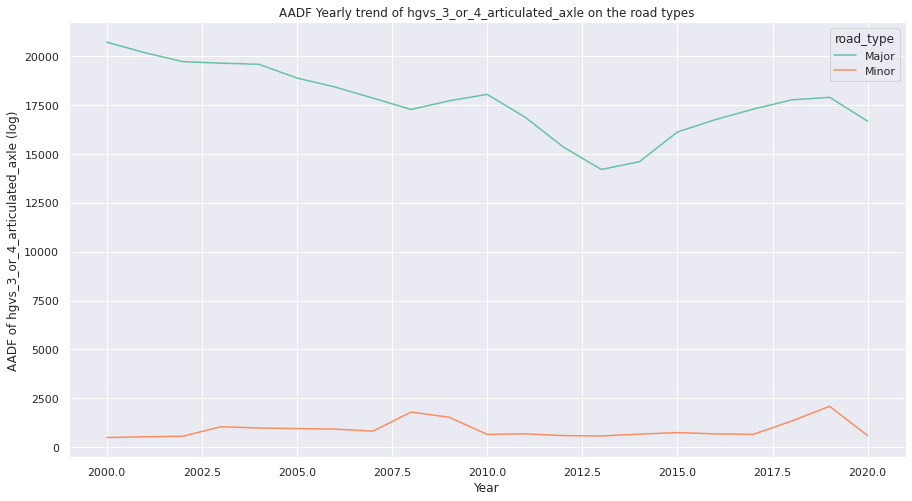

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


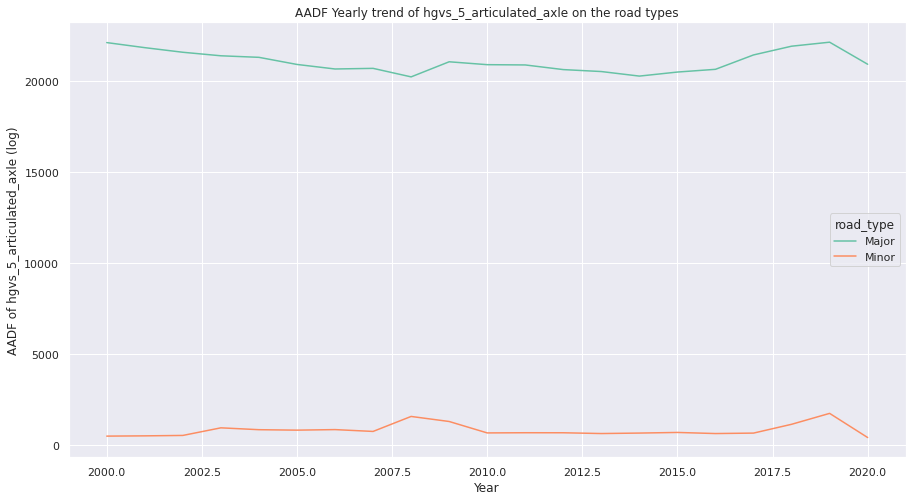

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


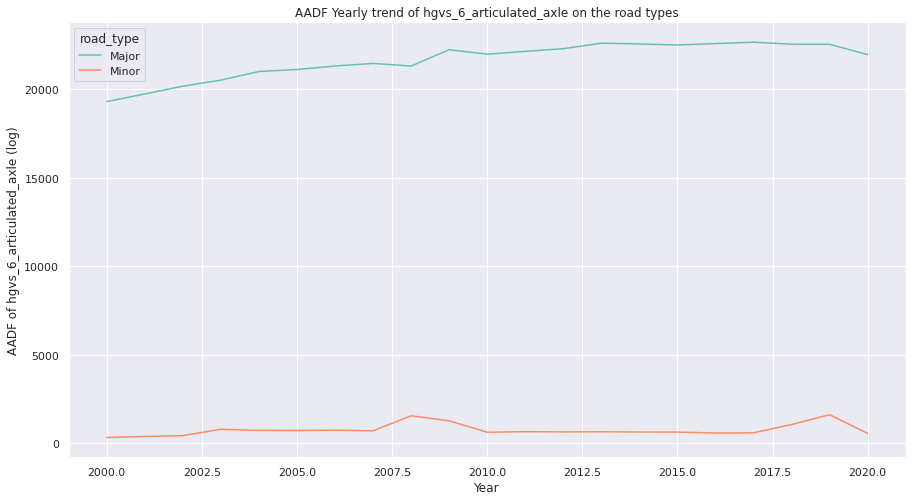

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


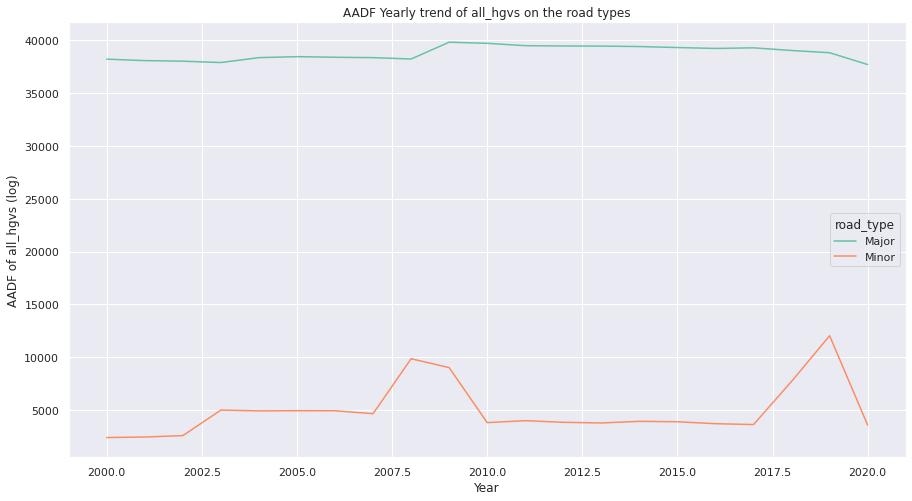

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


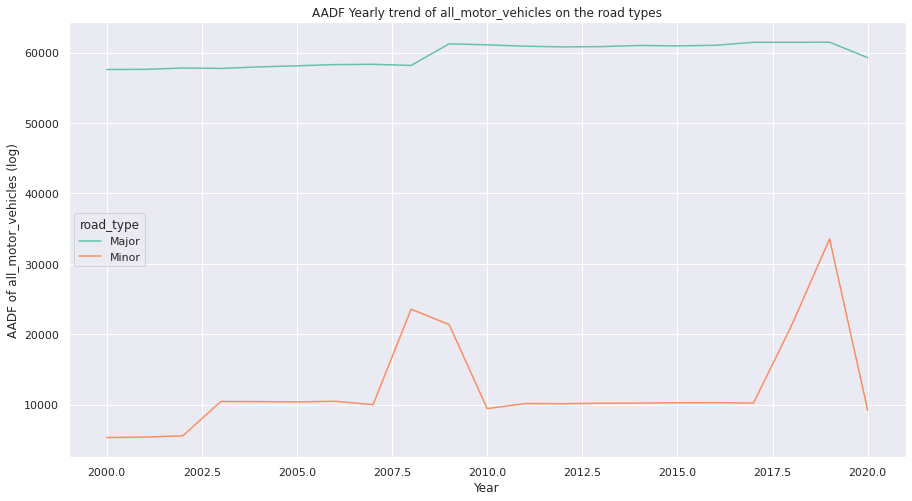

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


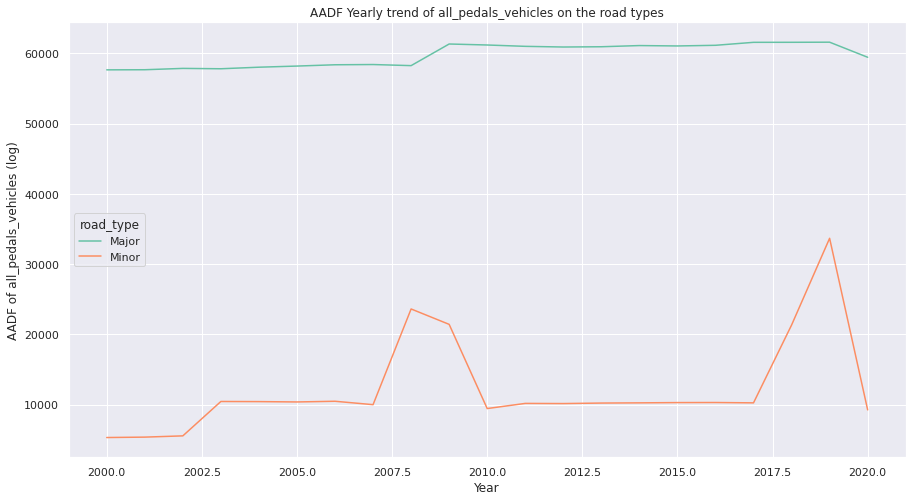

In [ ]:
#Plotting the trend of all vehicle type  AADF on different road type over the years

columns=['pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
       'all_motor_vehicles', 'all_pedals_vehicles']

for col in columns:
  plt.figure(figsize=(15,8))
  sns.lineplot(data["year"],np.log(data[col]),estimator="sum",ci=None,hue=data["road_type"])
  plt.title(f"AADF Yearly trend of {col} on the road types")
  plt.xlabel("Year")
  plt.ylabel(f"AADF of {col} (log)")
  plt.show()


## 7. AADF Distribution of the vehicles

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


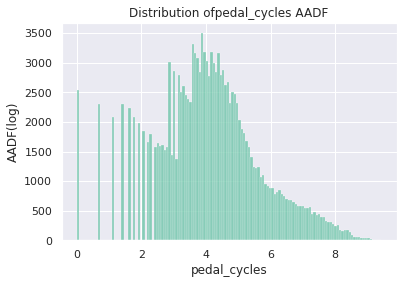

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


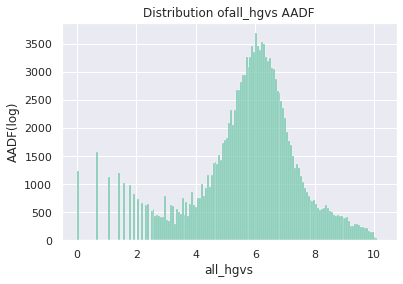

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


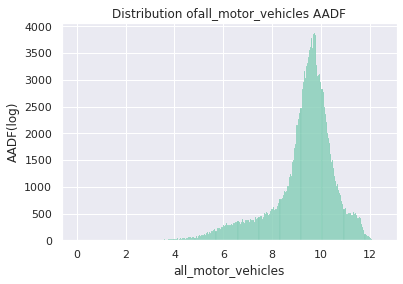

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


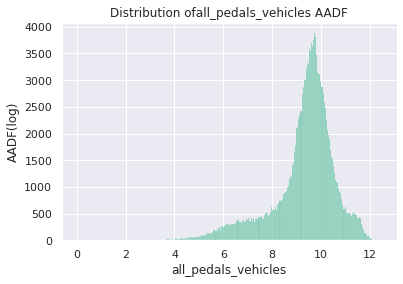

In [ ]:
# Distribution of all vehicles AADF 

columns=['pedal_cycles', 'all_hgvs',
       'all_motor_vehicles', 'all_pedals_vehicles']
for col in columns:
  chart=sns.histplot(np.log(data[col]))
  chart.set(title=f"Distribution of{col} AADF",ylabel="AADF(log)",xlabel=col)
  plt.show()

### Top Insights
1. Most vehicles pass through the major road
2. Over the years, the flow of traffic in minor road hasn't been stable.
3. Although all the hgv vehicles had a significant drop around 2012-2013, hgv6 was on a rise then.
4. There has been a major drop in the traffic flow generated by all vehicles in 2020.This was probably due to the COVID-19 Pandemic.
5. Westminster has the highest flow of traffic in London
6. Lancashire has the highest flow of traffic in North West
7. Durham has the highest flow of trafficin North East
8. Leeds has the highest flow of traffic in Yorkshire
9. Heavy goods vehicle causes more traffic on Yorkshire's major road than it causes in any other region.
10. London has the highest traffic flow from two wheeleed vehicles 
11. Most of the traffic flow in london is caused by motor vehicles like cars,taxis,buses,etc than is caused by HGV's.
12. The distribution of AADF Of HGV has an almost normal distribution except for a few outliers
13. The distribution of all motor vehicles is left-skewed meaning that the traffic flow from them is very high except for a few lower outliers



# Feature engineering

In [ ]:
#dropping columns for model creation
data.drop(["year","region_name","local_authority_name","road_category","local_authority_id","road_name","easting","northing","latitude","longitude"],axis=1,inplace=True)

In [ ]:
data.shape #checking the dimension of the data

(162753, 17)

In [ ]:
data["road_type"]=data["road_type"].map({"Major":1,"Minor":0}) #encoding the target variable

In [ ]:
data["road_type"]=data["road_type"].astype("int") #changing the type to integer

In [ ]:
data["road_type"].value_counts(normalize=True) #checking the ration of the target variables

1    0.789491
0    0.210509
Name: road_type, dtype: float64

In [ ]:
data=data.drop(["all_pedals_vehicles","all_motor_vehicles","all_hgvs"],axis=1) #dropping the sum of the vehicles in order to remove multicollinearity

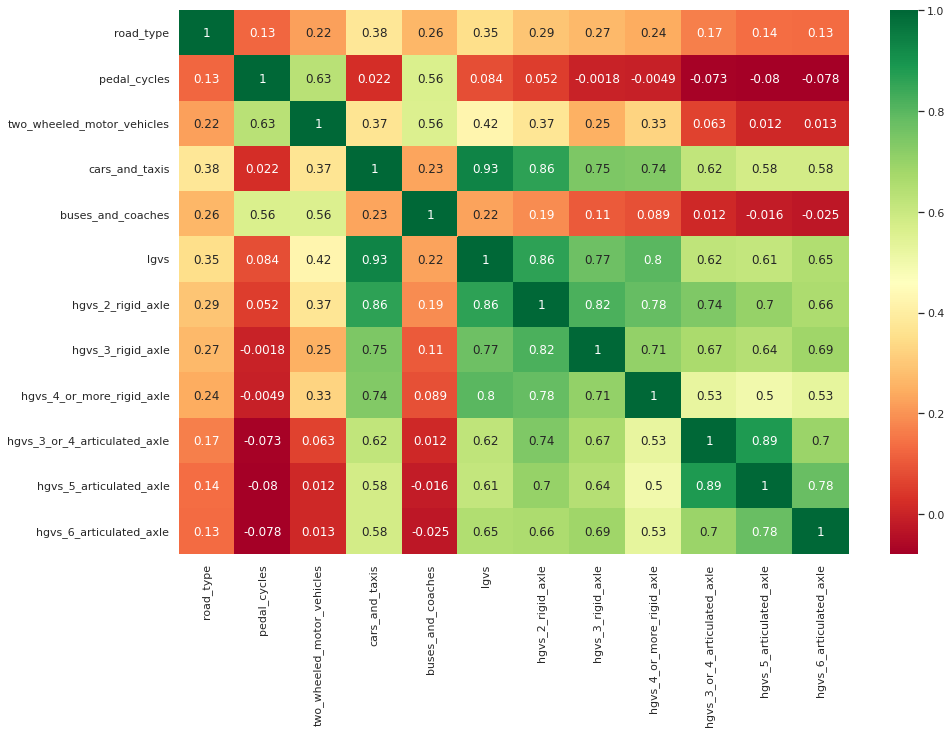

In [ ]:
#plotting a heatmap to visualize correlation between the different categories
plt.figure(figsize=(15,10))
corr_values=data.corr()
corr_index=corr_values.index
sns.heatmap(data[corr_index].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#data.road_category.value_counts() # checking the count of all the type of categories in the road category column

In [ ]:
data.estimation_method.value_counts()# checking the count of all the method of estimation

Estimated    95838
Counted      66915
Name: estimation_method, dtype: int64

In [ ]:
data.estimation_method_detailed.value_counts() #counting the unique estimation details in the dataset

Estimated using previous year's AADF on this link    87495
Manual count                                         61622
Estimated from nearby links                           8343
Dependent on a neighbouring counted link              3952
Automatic counter                                     1341
Name: estimation_method_detailed, dtype: int64

In [ ]:
#encoding all categorical variables into numbers so that the machine learning algorithm can understand it

road_map={'PA' :0,'MCU':1,'TA':2,'TM':3,'MB':4,'PM':5}
est_mtd={'Estimated' :0,'Counted':1}
est_mtd_details={"Estimated using previous year's AADF on this link":0,"Manual count" :1,"Estimated from nearby links" :2,"Dependent on a neighbouring counted link" :3,"Automatic counter" :4} 


data['estimation_method'] =data['estimation_method'].map(est_mtd)
data['estimation_method_detailed']=data['estimation_method_detailed'].map(est_mtd_details)

In [ ]:
#splitting the dataset using sklearn library

from sklearn.model_selection import train_test_split
X=data.drop(["road_type"],axis=1)
y=data["road_type"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0) #splitting the data into 60% train set and 40% test set

In [ ]:
#feature scaling

def min_max(data):
  """A function to normalize the data"""
  for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
  return data
    
# call the min_max function on the X_train
X_train_normalize = min_max(X_train[['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
       'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle']])

# Creating a new dataframe of the Xtrain by concatenating the normalized value and dropping the former values.
X_train=pd.concat([X_train.drop(['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
       'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle'],axis=1),X_train_normalize],axis=1)


# call the min_max function on the X_test
X_test_normalize = min_max(X_test[['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
       'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle']])


# Creating a new dataframe of the Xtrain by concatenating the normalized value and dropping the former values.
X_test=pd.concat([X_test.drop(['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
       'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle'],axis=1),X_test_normalize],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Oversampling the dataset to makeup for the class imbalance
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X_train, y_train)


In [ ]:
#Creating multiple models from different algorithms

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

DT_model=DecisionTreeClassifier().fit(X_over,y_over)

logistic = LogisticRegression()
logistic.fit(X_over,y_over)

RF_model=RandomForestClassifier(random_state=10)
RF_model.fit(X_over,y_over)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_over,y_over)
GB_model=GradientBoostingClassifier(random_state=2)
GB_model.fit(X_over,y_over)

GradientBoostingClassifier(random_state=2)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
def plot_cm(model, title):
  """A function for plotting the confusion matrix of each model"""
  cm=ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
  plt.title (f'Confusion matrix for {title} model')

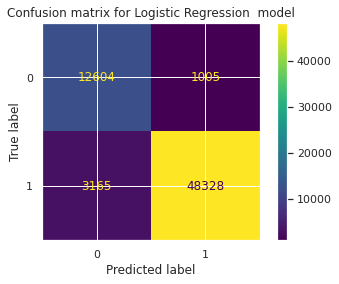

In [ ]:
plot_cm(logistic, 'Logistic Regression ') # The confusion matrix for the logistic regression model

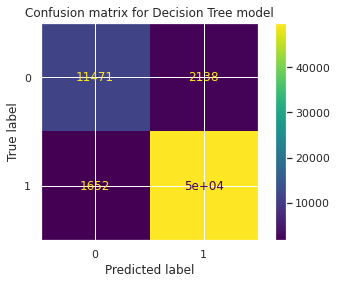

In [ ]:
plot_cm(DT_model, 'Decision Tree') # The confusion matrix for the Decision Tree model

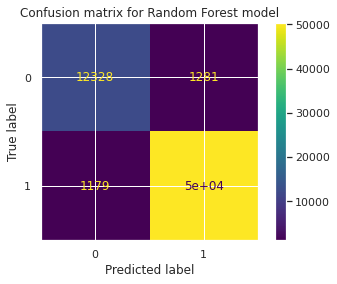

In [ ]:
plot_cm(RF_model, 'Random Forest')# The confusion matrix for the Random forest model

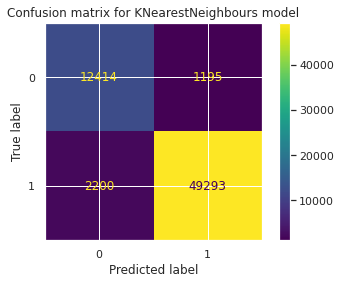

In [ ]:
plot_cm(knn,'KNearestNeighbours')# The confusion matrix for the KNearest Neighbors model

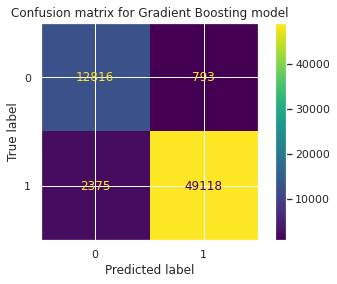

In [ ]:
plot_cm(GB_model,'Gradient Boosting')# The confusion matrix for the Gradient boosting model

In [ ]:
# Evaluating the models by checking their f1 score and roc_auc score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

models=[logistic,RF_model,knn,DT_model,GB_model]
accuracy=[]
f1=[]
roc=[]
for model in models: #looping through the models
  accuracy.append(model.score(X_test,y_test))#appending their accuracy score to the accuracy empty list
  f1.append(f1_score(y_test,model.predict(X_test))) #appending their f1 score to the f1 empty list
  roc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])) #appending their roc score to the roc empty list

In [ ]:
#creating a DataFrame from the accuracy score,f1 score and roc score of the different models

Model_comparison=pd.DataFrame({"Models":["Logistic Regression","Random Forest","K Nearest Neighbor","Decision Tree",
                                         "Gradient Boosting"],"Accuracy":accuracy,"F1 Score":f1,"Roc-Auc Score":roc})

In [ ]:
Model_comparison

,Models,Accuracy,F1 Score,Roc-Auc Score
0,Logistic Regression,0.935947,0.958642,0.982144
1,Random Forest,0.962213,0.976137,0.990152
2,K Nearest Neighbor,0.947851,0.966709,0.953642
3,Decision Tree,0.941784,0.963372,0.905408
4,Gradient Boosting,0.951338,0.968759,0.989382


In [ ]:
# saving the prediction probabilities of one of the target class(Major road type) into individual variables

y_pred_logistics = logistic.predict_proba(X_test)[:,1]
y_pred_RF = RF_model.predict_proba(X_test)[:,1]
y_pred_knn = knn.predict_proba(X_test)[:,1]
y_pred_DT = DT_model.predict_proba(X_test)[:,1]
y_pred_GB = GB_model.predict_proba(X_test)[:,1]

## Roc Curve

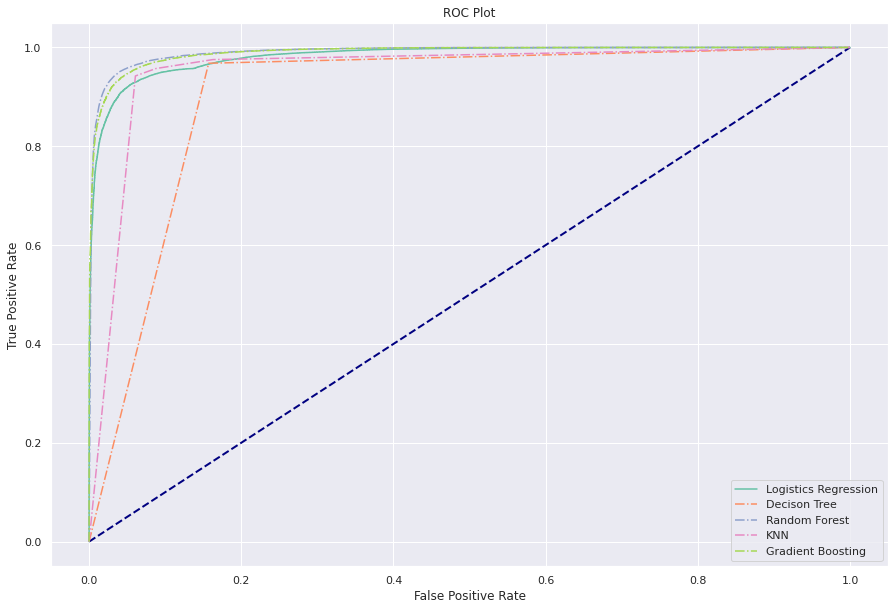

In [ ]:
from sklearn.metrics import roc_curve,auc
# Getting the false positive rate and true positive rate  of the various models by using the y_test and the prediction probabilities gotten from the previous  code cell
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, y_pred_logistics)
DT_fpr,DT_tpr,_=roc_curve(y_test, y_pred_DT)
RF_fpr,RF_tpr,_=roc_curve(y_test, y_pred_RF)
knn_fpr,knn_tpr,_=roc_curve(y_test, y_pred_knn)
GB_fpr,GB_tpr,_=roc_curve(y_test, y_pred_GB)

# using matplotlib to plot the  false positive rate and true positive rate values  into a line plot to visualize the roc-auc curve of the models
plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.plot(logistic_fpr,logistic_tpr ,linestyle='-', label='Logistics Regression')
plt.plot(DT_fpr,DT_tpr ,linestyle='-.', label='Decison Tree')
plt.plot(RF_fpr,RF_tpr ,linestyle='-.', label='Random Forest')
plt.plot(knn_fpr,knn_tpr ,linestyle='-.', label='KNN')
plt.plot(GB_fpr,GB_tpr ,linestyle='-.', label='Gradient Boosting')

plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend() 
plt.show()

## Precision-Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

# Getting the precision and recall score of the various models by using the y_test and the prediction probabilities gotten from the previous two code cells
logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, y_pred_logistics)
DT_precision,DT_recall,_=precision_recall_curve(y_test, y_pred_DT)
RF_precision,RF_recall,_=precision_recall_curve(y_test, y_pred_RF)
knn_precision,knn_recall,_=precision_recall_curve(y_test, y_pred_knn)
GB_precision,GB_recall,_=precision_recall_curve(y_test, y_pred_GB)

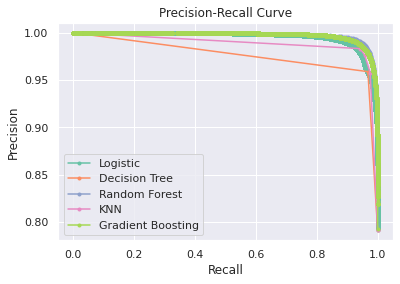

In [ ]:
#plotting the precision and recall scores gotten from the previous cell into a line plot to visualize the precision-recall curve of the models

plt.plot(logistic_recall,logistic_precision, marker='.', label='Logistic')
plt.plot(DT_recall,DT_precision, marker='.', label='Decision Tree')
plt.plot(RF_recall,RF_precision, marker='.', label='Random Forest')
plt.plot(knn_recall,knn_precision, marker='.', label='KNN')
plt.plot(GB_recall,GB_precision, marker='.', label='Gradient Boosting')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend();